In [14]:
import tkinter as tk
from tkinter import filedialog
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt

import json


In [15]:
# 폴더 패스 ui로 선택하기

# root = tk.Tk()
# root.withdraw()  # Tkinter 기본 창 숨기기

# folder_path = filedialog.askdirectory(title="엑셀 데이터가 있는 폴더를 선택하세요")

# if folder_path:
#     print(f"선택된 폴더: {folder_path}")
# else:
#     print("폴더 선택이 취소되었습니다.")


## 폴더 패스 직접 입력하기 @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
folder_name='251030 exp#149 HHC 앞뒤 Al 5T driven 0.2barg He M6.8 2.5MHz FL200x2 200-350 TC'
folder_path = os.path.join('/Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci', folder_name)


In [16]:
# 파일 경로 설정
file_name = folder_name[:14]+'_sliced_data_PT_filtered.xlsx'
# file_name = folder_name[:14]+'_sliced_data_PT.xlsx'
file_path = os.path.join(folder_path, file_name)

# 엑셀 파일 읽기
try:
    df = pd.read_excel(file_path)
    print("엑셀 파일 불러오기 완료")
    print(df.head())
except FileNotFoundError:
    print(f"파일을 찾을 수 없습니다: {file_path}")
#대충 10초 걸림

엑셀 파일 불러오기 완료
       전압_0      전압_1      전압_2      전압_3          전압_4      전압_5      전압_6  \
0  0.000027  0.000012  0.000024 -0.000184 -1.690719e-07 -0.000017  0.000017   
1  0.000177 -0.000001 -0.000133 -0.000292  1.265333e-04 -0.000011  0.000107   
2  0.000215 -0.000090 -0.000127 -0.000142  5.143260e-05 -0.000138  0.000066   
3  0.000159 -0.000024 -0.000116 -0.000082 -6.204471e-05 -0.000256  0.000072   
4  0.000041  0.000184 -0.000147 -0.000373 -1.016212e-04 -0.000128  0.000068   

       전압_7  전압_8  전압_9  ...     전압_14       전압_15       전압_16       전압_17  \
0 -0.000019     0     0  ...  1.539683  121.043812  136.570411  136.588084   
1 -0.000003     0     0  ...  1.497194  121.160949  137.480729  137.498248   
2  0.000075     0     0  ...  1.475949  121.067240  138.391294  138.408482   
3  0.000142     0     0  ...  1.518438  121.887195  139.301965  139.318680   
4  0.000192     0     0  ...  1.539683  120.059866  140.212424  140.228809   

        전압_18       전압_19       전압_20     

In [17]:
# DAQ connection 엑셀 파일명 (고정)
DAQ_connection = "DAQ connection.xlsx"
DAQ_connection_path = os.path.join(folder_path, DAQ_connection)

# DAQ connection 불러오기 (기본 첫 번째 시트)
DAQ_connection_data = pd.read_excel(DAQ_connection_path)
print(f"{DAQ_connection} 파일 불러오기 완료")
print(DAQ_connection_data.head())

DAQ connection.xlsx 파일 불러오기 완료
   # type          PN     SN     cal         a    b          etc filter
0  0    P  PCB 132B38  10952  a(V-c)  0.533669  0.0  model front     BP
1  1    P  PCB 132B38  10953  a(V-c)  0.405755  0.0        model     BP
2  2    P  PCB 132B38  10954  a(V-c)  0.506799  0.0        model     BP
3  3    P  PCB 132B38  10955  a(V-c)  0.460219  0.0        model     BP
4  4    P  PCB 132B38  10956  a(V-c)  0.501017  0.0        model     BP


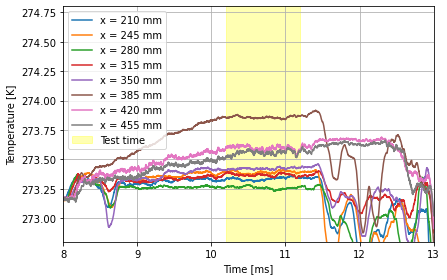

그래프 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/251030 exp#149 HHC 앞뒤 Al 5T driven 0.2barg He M6.8 2.5MHz FL200x2 200-350 TC/Temp.pdf
데이터 파일 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/251030 exp#149 HHC 앞뒤 Al 5T driven 0.2barg He M6.8 2.5MHz FL200x2 200-350 TC/Temp_data_for_gnuplot.dat


In [18]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 샘플링 주파수 [Hz]
FPS = 2.5e6   #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
dt = 1 / FPS
num_samples = len(df)

# 시각화 범위
start_time_ms = 8   #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ 134: 8.2,  132: 8,   129:5.9  141:7.5
end_time_ms = start_time_ms+5   #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ 

ymin= 272.8
ymax= 274.8

# 시험 시간 범위 (ms)
that_time=8.7 #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ 134, 132: 8.4,   129:6.3  141:8.7

test_start_ms = that_time+1.5   #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
test_end_ms =that_time + 2.5   #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

# 시간축 생성 (-1 ms 시작)
time_axis = np.arange(num_samples) * dt - 1e-3  # [s]
time_axis_ms = time_axis * 1e3  # [ms]

# medtherm thermocouple 채널 찾기
thermo_rows = DAQ_connection_data[DAQ_connection_data['PN'] == 'medtherm thermocouple']
thermo_indices = thermo_rows['#'].values.astype(int)

# 온도 데이터를 담을 리스트
data_matrix = []
header = ["x[ms]"]

# 그래프
plt.figure(figsize=(6, 4))
for i, idx in enumerate(thermo_indices):

    col_name = f'전압_{idx}'
    if col_name in df.columns:
        distance_mm = 210 + 35 * i

        # x=455 mm 제외
        # if distance_mm == 455:
        #     continue

        temp_vector = df[col_name].values
        data_matrix.append(temp_vector)
        header.append(f"T@{distance_mm}mm")
        plt.plot(time_axis_ms, temp_vector, label=f"x = {distance_mm} mm")


# 시험 시간 음영
plt.axvspan(test_start_ms, test_end_ms, color='yellow', alpha=0.3, label='Test time')

# 레이블 및 축
plt.xlabel("Time [ms]")
plt.ylabel("Temperature [K]")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xlim(start_time_ms, end_time_ms)
plt.ylim(ymin,ymax)   #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

# PDF 저장
pdf_path = os.path.join(folder_path, "Temp.pdf")
plt.savefig(pdf_path, dpi=600, bbox_inches='tight')
plt.show()
print(f"그래프 저장 완료: {pdf_path}")

# DAT 파일 저장 (Gnuplot용)
dat_path = os.path.join(folder_path, "Temp_data_for_gnuplot.dat")
data_array = np.column_stack([time_axis_ms] + data_matrix)
df_export = pd.DataFrame(data_array, columns=header)
df_export.to_csv(dat_path, sep="\t", index=False, float_format="%.6f")
print(f"데이터 파일 저장 완료: {dat_path}")

# legend 정보 수정: 거리 값만 추출
legend_labels = [int(s.split("@")[1].replace("mm", "")) for s in header[1:]]

# 메타데이터 딕셔너리
meta_info = {
    "xlim": [start_time_ms, end_time_ms],
    "ylim": [ymin,ymax],#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
    "xlabel": "Time [ms]",
    "ylabel": "Temperature [K]",
    "shaded_region": [test_start_ms, test_end_ms],
    "sensor_positions_mm": legend_labels
}

# 저장
meta_path = os.path.join(folder_path, "Temp_data_for_gnuplot.meta.json")
with open(meta_path, "w") as f:
    json.dump(meta_info, f, indent=4)



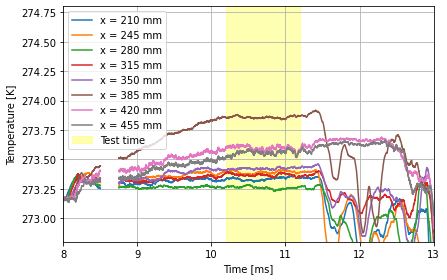

그래프 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/251030 exp#149 HHC 앞뒤 Al 5T driven 0.2barg He M6.8 2.5MHz FL200x2 200-350 TC/Temp_removed_ranges.pdf
데이터 파일 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/251030 exp#149 HHC 앞뒤 Al 5T driven 0.2barg He M6.8 2.5MHz FL200x2 200-350 TC/Temp_removed_ranges.dat
메타 파일 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/251030 exp#149 HHC 앞뒤 Al 5T driven 0.2barg He M6.8 2.5MHz FL200x2 200-350 TC/Temp_removed_ranges.meta.json


In [19]:
# === [섹션 1] 특정 시간 구간 제거 후 플롯 (인터폴레이션 없이, 라인 끊김) ===
# 제거할 구간(ms) 지정: 필요시 자유롭게 수정
bad_ranges_ms = [(8.5, 8.75)]

# 제거 마스크 생성 (여러 구간을 합집합으로 처리)
bad_mask = np.zeros_like(time_axis_ms, dtype=bool)
for a, b in bad_ranges_ms:
    bad_mask |= (time_axis_ms >= a) & (time_axis_ms <= b)
good_mask = ~bad_mask

# 플롯 및 저장
plt.figure(figsize=(6, 4))
data_matrix_cut = []
header = ["x[ms]"]

for i, idx in enumerate(thermo_indices):
    col_name = f'전압_{idx}'
    if col_name in df.columns:
        distance_mm = 210 + 35 * i

        # 원본 복사 후 제거 구간을 NaN으로 설정하면 Matplotlib이 해당 구간만 끊어서 그림
        y = df[col_name].values.astype(float).copy()
        y[~good_mask] = np.nan

        data_matrix_cut.append(y)
        header.append(f"T@{distance_mm}mm")
        plt.plot(time_axis_ms, y, label=f"x = {distance_mm} mm")

# 시험 시간 음영 표시(기존 변수 사용)
plt.axvspan(test_start_ms, test_end_ms, color='yellow', alpha=0.3, label='Test time')

plt.xlabel("Time [ms]")
plt.ylabel("Temperature [K]")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xlim(start_time_ms, end_time_ms)
plt.ylim(ymin, ymax)

# 파일 저장(이름만 다르게)
pdf_path = os.path.join(folder_path, "Temp_removed_ranges.pdf")
plt.savefig(pdf_path, dpi=600, bbox_inches='tight')
plt.show()
print(f"그래프 저장 완료: {pdf_path}")

# DAT 저장(gnuplot용). NaN은 선을 끊는 용도로 유지
dat_path = os.path.join(folder_path, "Temp_removed_ranges.dat")
data_array = np.column_stack([time_axis_ms] + data_matrix_cut)
df_export = pd.DataFrame(data_array, columns=header)
df_export.to_csv(dat_path, sep="\t", index=False, float_format="%.6f", na_rep="NaN")
print(f"데이터 파일 저장 완료: {dat_path}")

# 메타 정보 저장(제거 구간 기록 추가)
meta_info_cut = {
    "xlim": [start_time_ms, end_time_ms],
    "ylim": [ymin, ymax],
    "xlabel": "Time [ms]",
    "ylabel": "Temperature [K]",
    "shaded_region": [test_start_ms, test_end_ms],
    "sensor_positions_mm": [int(s.split('@')[1].replace('mm','')) for s in header[1:]],
    "removed_ranges_ms": bad_ranges_ms
}
meta_path = os.path.join(folder_path, "Temp_removed_ranges.meta.json")
with open(meta_path, "w") as f:
    json.dump(meta_info_cut, f, indent=4)
print(f"메타 파일 저장 완료: {meta_path}")


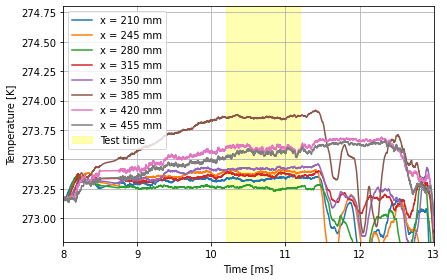

[pchip] 그래프 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/251030 exp#149 HHC 앞뒤 Al 5T driven 0.2barg He M6.8 2.5MHz FL200x2 200-350 TC/Temp_filled_pchip.pdf
[pchip] 데이터 파일 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/251030 exp#149 HHC 앞뒤 Al 5T driven 0.2barg He M6.8 2.5MHz FL200x2 200-350 TC/Temp_data_pchip_filled.dat


In [20]:
# === [섹션 2] 결손 구간 보간: 4가지 방법(4번째는 결손 구간에만 필터/블렌딩) ===
from scipy.interpolate import interp1d, PchipInterpolator
from scipy.signal import butter, filtfilt
import numpy as np
import matplotlib.pyplot as plt
import os


def build_bad_masks(time_ms, bad_ranges):
    masks = []
    bad_union = np.zeros_like(time_ms, dtype=bool)
    for a, b in bad_ranges:
        m = (time_ms >= a) & (time_ms <= b)
        masks.append(m)
        bad_union |= m
    return masks, bad_union

gap_masks, gap_union_mask = build_bad_masks(time_axis_ms, bad_ranges_ms)

def make_nan_in_gaps(y, gap_union_mask):
    y_nan = y.astype(float).copy()
    y_nan[gap_union_mask] = np.nan
    return y_nan

def fill_pchip_in_gaps(t_ms, y_raw, masks, gap_union_mask):
    """
    지정된 gap들만 PCHIP으로 채우고, 나머지 구간은 원본 유지.
    """
    y_nan = make_nan_in_gaps(y_raw, gap_union_mask)
    good = ~np.isnan(y_nan)
    if good.sum() < 2:
        return y_raw  # 안전장치
    f = PchipInterpolator(t_ms[good], y_nan[good])
    y_out = y_nan.copy()
    for m in masks:
        if m.sum() == 0:
            continue
        y_out[m] = f(t_ms[m])
    return y_out

# ---------- 1) PCHIP으로 채운 결과를 플롯 ----------
plt.figure(figsize=(6, 4))
filled_columns = []  # 후에 저장용으로 추적
header = ["x[ms]"]
data_matrix_filled = []

for i, idx in enumerate(thermo_indices):
    col = f'전압_{idx}'
    if col not in df.columns:
        continue

    y_raw = df[col].values.astype(float)
    y_filled = fill_pchip_in_gaps(time_axis_ms, y_raw, gap_masks, gap_union_mask)

    # 플롯
    distance_mm = 210 + 35 * i
    plt.plot(time_axis_ms, y_filled, label=f"x = {distance_mm} mm")

    # 저장용 버퍼
    filled_columns.append(col)
    data_matrix_filled.append(y_filled)
    header.append(f"T@{distance_mm}mm")

# 시험 시간 음영
plt.axvspan(test_start_ms, test_end_ms, color='yellow', alpha=0.3, label='Test time')

plt.xlabel("Time [ms]"); plt.ylabel("Temperature [K]")
plt.grid(True); plt.legend(); plt.tight_layout()
plt.xlim(start_time_ms, end_time_ms); plt.ylim(ymin, ymax)

pdf_path = os.path.join(folder_path, "Temp_filled_pchip.pdf")
plt.savefig(pdf_path, dpi=600, bbox_inches='tight')
plt.show()
print(f"[pchip] 그래프 저장 완료: {pdf_path}")

# ---------- 2) 원 df에 보간값 덮어쓰기 ----------
for col, y_filled in zip(filled_columns, data_matrix_filled):
    df[col] = y_filled

# ---------- 3) 결과 저장 ----------
# (a) gnuplot용 DAT (보간된 값으로)
dat_path = os.path.join(folder_path, "Temp_data_pchip_filled.dat")
data_array = np.column_stack([time_axis_ms] + data_matrix_filled)
df_export = pd.DataFrame(data_array, columns=header)
df_export.to_csv(dat_path, sep="\t", index=False, float_format="%.6f")
print(f"[pchip] 데이터 파일 저장 완료: {dat_path}")





데이터 파일 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/251030 exp#149 HHC 앞뒤 Al 5T driven 0.2barg He M6.8 2.5MHz FL200x2 200-350 TC/Temp_data_for_gnuplot.dat


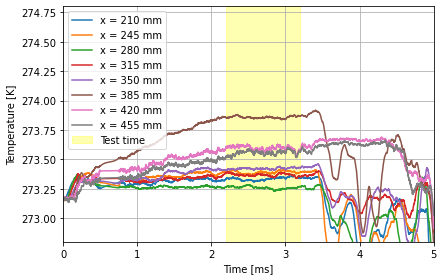

In [21]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json




# 시간축 생성 (-1ms 시작)
time_axis = np.arange(num_samples) * dt - 1e-3  # [s]
time_axis_ms = time_axis * 1e3  # [ms]
time_axis_shifted = time_axis_ms - start_time_ms  # ⬅️ 평행이동 적용

# medtherm thermocouple 채널 찾기
thermo_rows = DAQ_connection_data[DAQ_connection_data['PN'] == 'medtherm thermocouple']
thermo_indices = thermo_rows['#'].values.astype(int)

# 온도 데이터를 담을 리스트
data_matrix = []
header = ["x[ms]"]

# 그래프
plt.figure(figsize=(6, 4))
for i, idx in enumerate(thermo_indices):
    col_name = f'전압_{idx}'
    if col_name in df.columns:
        distance_mm = 210 + 35 * i

        # x = 455 mm 제외
        # if distance_mm == 455:
        #     continue

        temp_vector = df[col_name].values
        data_matrix.append(temp_vector)
        header.append(f"T@{distance_mm}mm")
        plt.plot(time_axis_shifted, temp_vector, label=f"x = {distance_mm} mm")

# 시험 시간 음영 (shift 적용)
plt.axvspan(test_start_ms - start_time_ms, test_end_ms - start_time_ms,
            color='yellow', alpha=0.3, label='Test time')

# 레이블 및 축
plt.xlabel("Time [ms]")
plt.ylabel("Temperature [K]")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xlim(0, end_time_ms - start_time_ms)
plt.ylim(ymin, ymax)

# # PDF 저장
# pdf_path = os.path.join(folder_path, "Temp.pdf")
# plt.savefig(pdf_path, dpi=600, bbox_inches='tight')
# plt.show()
# print(f"그래프 저장 완료: {pdf_path}")

# DAT 파일 저장 (Gnuplot용)
dat_path = os.path.join(folder_path, "Temp_data_for_gnuplot.dat")
data_array = np.column_stack([time_axis_shifted] + data_matrix)
df_export = pd.DataFrame(data_array, columns=header)
df_export.to_csv(dat_path, sep="\t", index=False, float_format="%.6f")
print(f"데이터 파일 저장 완료: {dat_path}")

# legend 정보: 거리 값만 추출 (455 mm는 header에 없으므로 자동 제외)
legend_labels = [int(s.split("@")[1].replace("mm", "")) for s in header[1:]]

# 메타데이터 딕셔너리
meta_info = {
    "xlim": [0, end_time_ms - start_time_ms],
    "ylim": [ymin, ymax],
    "xlabel": "Time [ms]",
    "ylabel": "Temperature [K]",
    "shaded_region": [test_start_ms - start_time_ms, test_end_ms - start_time_ms],
    "sensor_positions_mm": legend_labels
}

# JSON 저장
meta_path = os.path.join(folder_path, "Temp_data_for_gnuplot.meta.json")
with open(meta_path, "w") as f:
    json.dump(meta_info, f, indent=4)


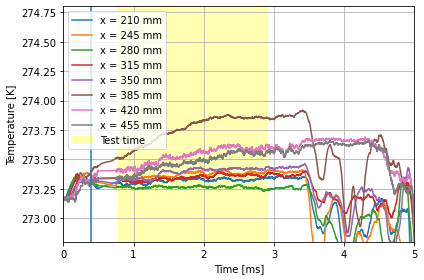

그래프 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/251030 exp#149 HHC 앞뒤 Al 5T driven 0.2barg He M6.8 2.5MHz FL200x2 200-350 TC/Temp.pdf


In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import json


that_time=0.4 # 노즐 샥이 아닌 첫 컨텍이 오는 타이밍

ready_time=0.3808
test_time=2.1

# 경로 설정 (사용자가 직접 지정)

dat_file = os.path.join(folder_path, "Temp_data_for_gnuplot.dat")
meta_file = os.path.join(folder_path, "Temp_data_for_gnuplot.meta.json")

# 파일 읽기
df_plot = pd.read_csv(dat_file, sep="\t")
with open(meta_file, "r") as f:
    meta = json.load(f)

# 시간 벡터
time_ms = df_plot.iloc[:, 0]
columns = df_plot.columns[1:]
positions = meta["sensor_positions_mm"]

# 그래프
plt.figure(figsize=(6, 4))
for col, pos in zip(columns, positions):
    plt.plot(time_ms, df_plot[col], label=f"x = {pos} mm")

# 시험 시간 음영
shaded_start, shaded_end = meta["shaded_region"]
plt.axvspan(that_time+ready_time, that_time+ready_time+test_time, color='yellow', alpha=0.3, label="Test time")

plt.vlines(x=that_time,ymin=272,ymax=275)
# 축 설정

plt.xlabel(meta["xlabel"])
plt.ylabel(meta["ylabel"])
plt.xlim(meta["xlim"])
plt.ylim(meta["ylim"])
plt.legend()
plt.grid(True)
plt.tight_layout()

# PDF 저장
pdf_path = os.path.join(folder_path, "Temp.pdf")
plt.savefig(pdf_path, dpi=600, bbox_inches='tight')
plt.show()
print(f"그래프 저장 완료: {pdf_path}")

plt.show()



In [24]:
import os
import pandas as pd
import numpy as np
from numba import njit

# ========= Numba 열유속 계산 함수 =========
@njit
def calculate_heat_flux_numba(time_array, temperature_array):
    n = len(time_array)
    q = np.zeros(n)
    k = 8.9163e+03
    sqrt_pi = np.sqrt(np.pi)

    for t_n in range(1, n):
        sum_term = 0.0
        for i in range(1, t_n + 1):
            dt_i = time_array[t_n] - time_array[i - 1]
            dt_ii = time_array[t_n] - time_array[i]
            if dt_i <= 0 or dt_ii <= 0:
                continue
            temp_diff = temperature_array[i] - temperature_array[i - 1]
            sum_term += temp_diff / (np.sqrt(dt_i) + np.sqrt(dt_ii))
        q[t_n] = (2 * k / sqrt_pi) * sum_term

    return q

In [25]:
# ========= 실행 코드 =========

# 시간 범위 설정 [ms]
start_ms = 0   #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@  위의 가시화 이미지에서의 x축을 써야함 즉 0부터 시작해야함
end_ms = start_ms+5   #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


# 경로 설정
dat_file = os.path.join(folder_path, "Temp_data_for_gnuplot.dat")
save_file = os.path.join(folder_path, "HeatFlux_data_for_gnuplot.dat")



# 데이터 로드 및 시간 필터링
df_temp = pd.read_csv(dat_file, sep="\t")
df_temp_cut = df_temp[(df_temp["x[ms]"] >= start_ms) & (df_temp["x[ms]"] <= end_ms)].reset_index(drop=True)
time_array_s = df_temp_cut["x[ms]"].values / 1000  # ms → s

# 열유속 계산
df_heat = pd.DataFrame()
df_heat["time [ms]"] = df_temp_cut["x[ms]"]

for col in df_temp_cut.columns[1:]:
    print(f"Calculating heat flux for {col}...")
    temp_array = df_temp_cut[col].values
    q_array = calculate_heat_flux_numba(time_array_s, temp_array)
    pos = col.split("@")[1]
    # if col != 'T@280mm':
    df_heat[f"q@{pos}"] = q_array

# 저장
df_heat.to_csv(save_file, sep="\t", index=False, float_format="%.6f")
print(f"✅ 저장 완료: {save_file}")
#21초


Calculating heat flux for T@210mm...
Calculating heat flux for T@245mm...
Calculating heat flux for T@280mm...
Calculating heat flux for T@315mm...
Calculating heat flux for T@350mm...
Calculating heat flux for T@385mm...
Calculating heat flux for T@420mm...
Calculating heat flux for T@455mm...
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/251030 exp#149 HHC 앞뒤 Al 5T driven 0.2barg He M6.8 2.5MHz FL200x2 200-350 TC/HeatFlux_data_for_gnuplot.dat


In [62]:
## 폴더 패스 직접 입력하기 @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
folder_name='250725 exp#134 half half cone2 PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous'
folder_path = os.path.join('/Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci', folder_name)

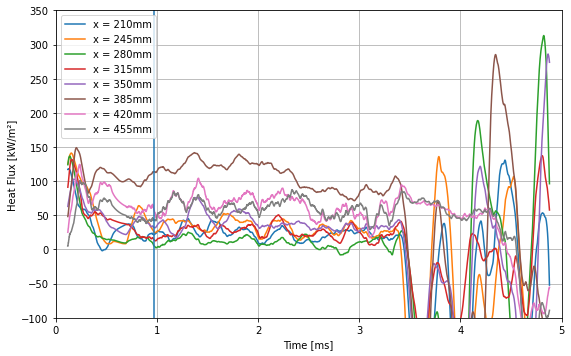

In [26]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 파일 경로
heatflux_file = os.path.join(folder_path, "HeatFlux_data_for_gnuplot.dat")

# # 시험 시간 범위 (단위: ms)
test_start_ms = 2.8
test_end_ms = 10

# # 시각화 범위
start_time_ms = 0   #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
end_time_ms = start_time_ms+5  #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


# 데이터 로드
df_q = pd.read_csv(heatflux_file, sep="\t")
time_ms = df_q["time [ms]"].values
valid_range = slice(300, -300)

# 플롯
plt.figure(figsize=(8, 5))
for col in df_q.columns[1:]:
    pos = col.split("@")[1]
    
    smoothed = df_q[col].rolling(window=300, center=True).mean()
    plt.plot(time_ms[valid_range], (smoothed / 1000).values[valid_range], label=f"x = {pos}")

# 시험 시간 음영
# plt.axvspan(test_start_ms, test_end_ms, color='yellow', alpha=0.3, label='Test time')

plt.vlines(x=0.97,ymin=-100,ymax=350)

# 축 및 저장
plt.xlabel("Time [ms]")
plt.ylabel("Heat Flux [kW/m²]")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xlim(start_time_ms, end_time_ms)
plt.ylim(-100, 350)

# 저장
pdf_path = os.path.join(folder_path, "HeatFlux.pdf")
plt.savefig(pdf_path, dpi=600, bbox_inches='tight')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


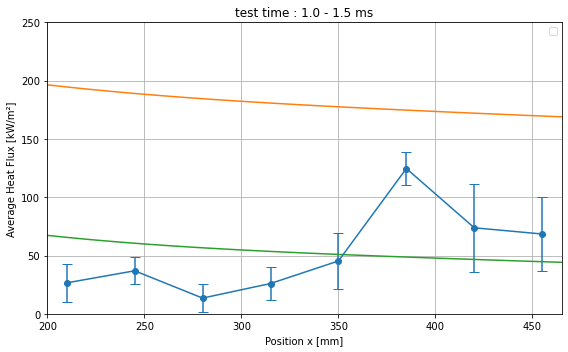

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


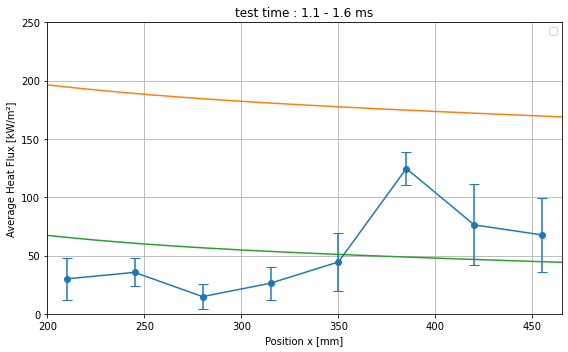

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


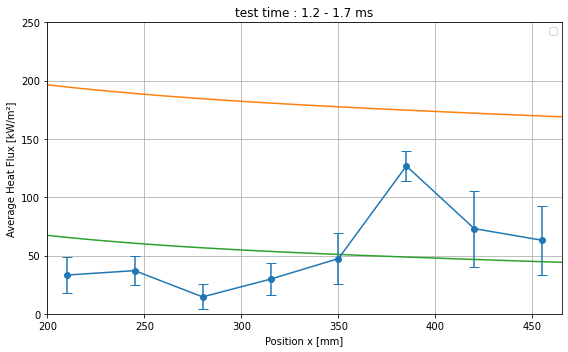

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


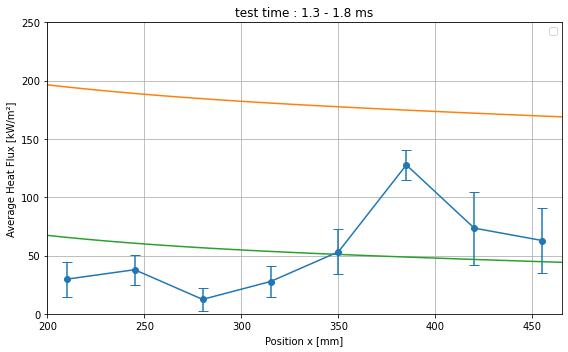

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


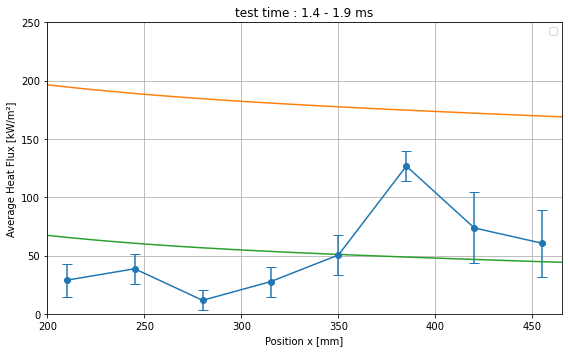

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


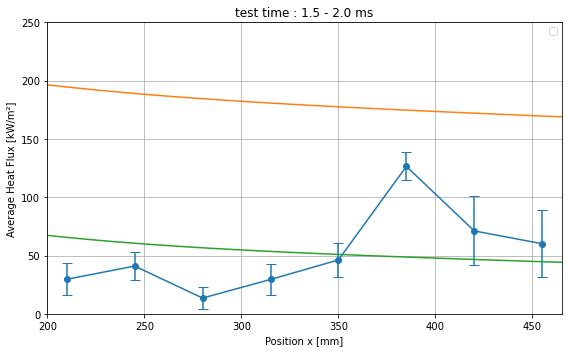

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


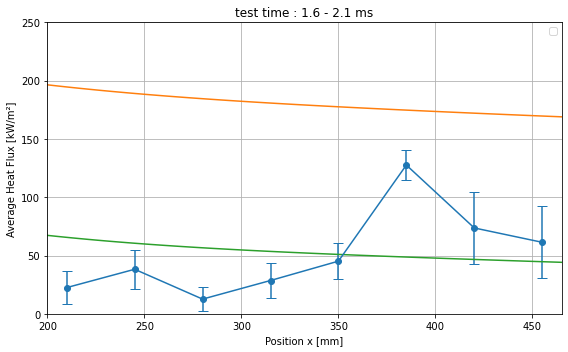

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


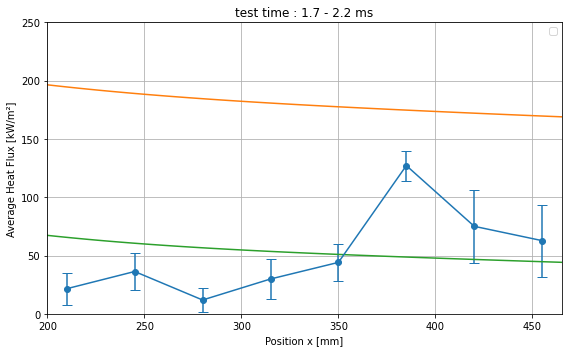

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


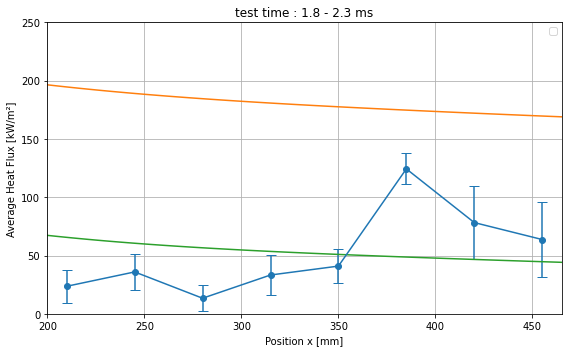

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


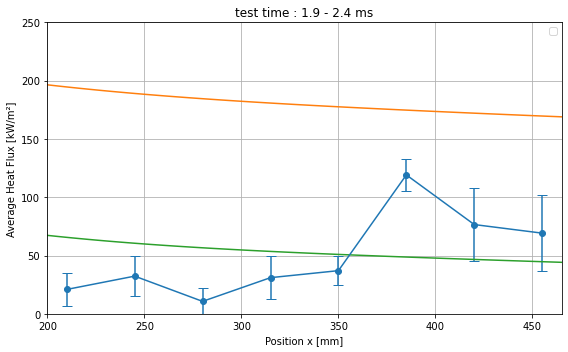

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


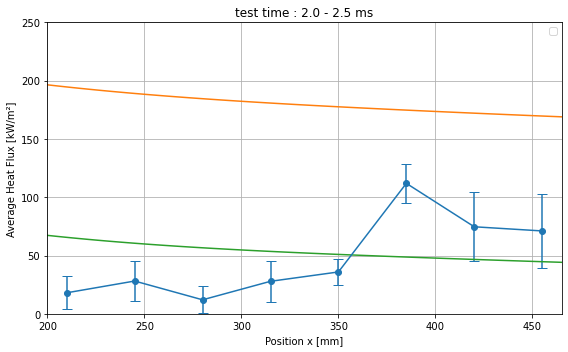

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


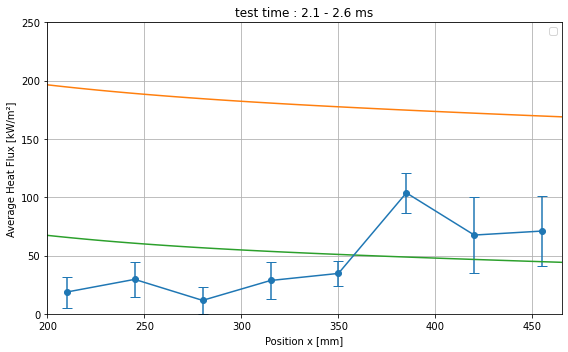

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


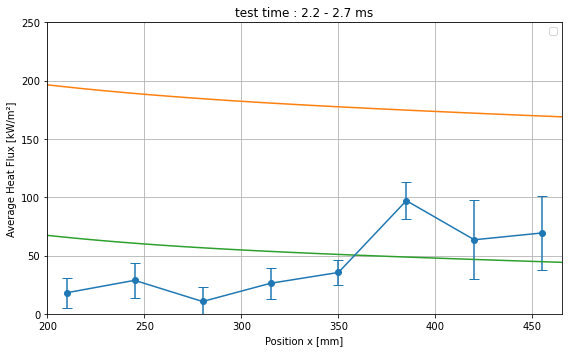

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


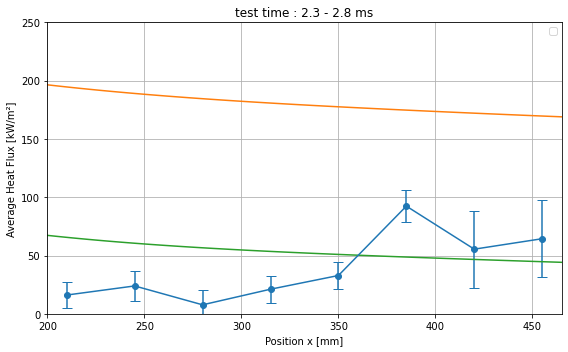

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


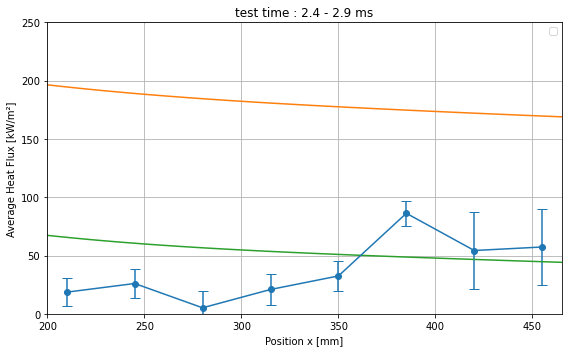

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


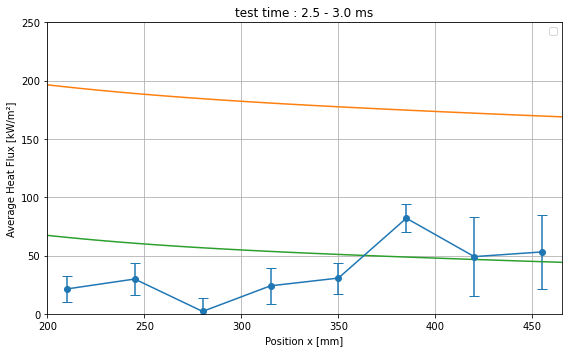

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


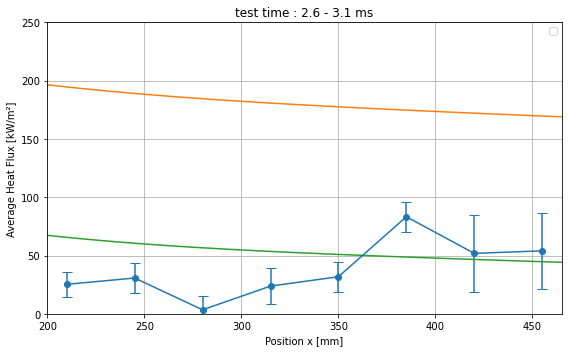

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


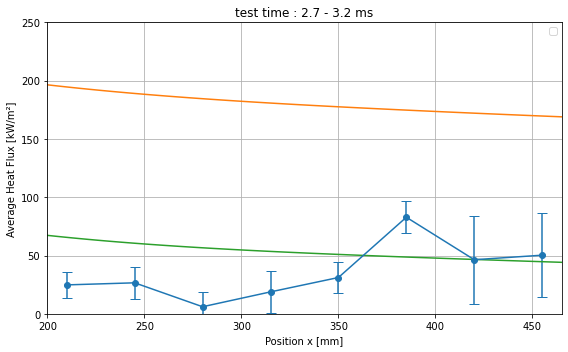

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


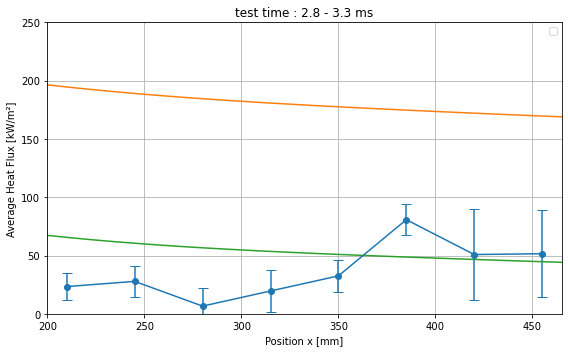

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


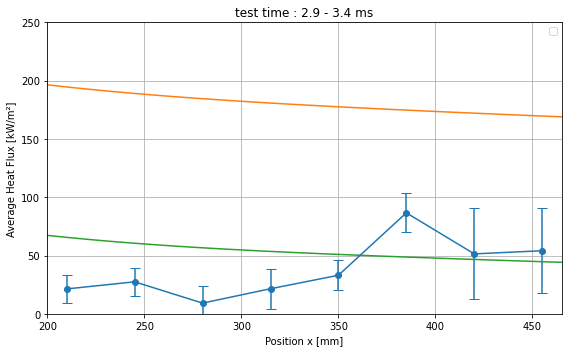

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


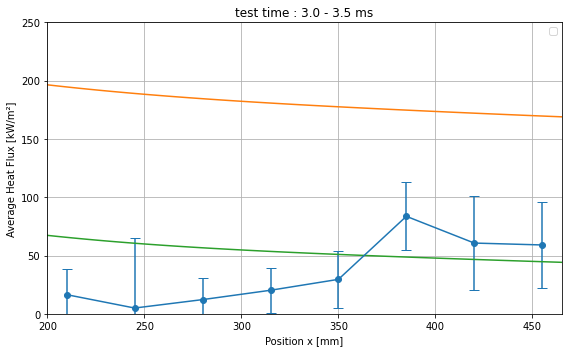

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


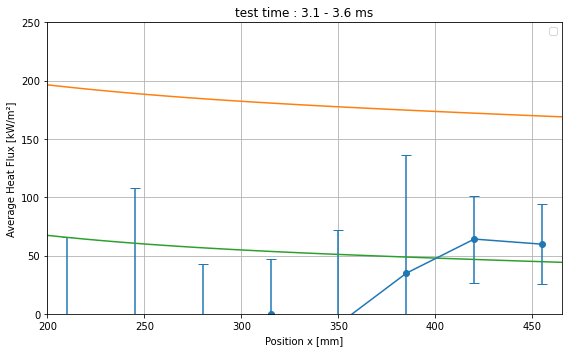

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


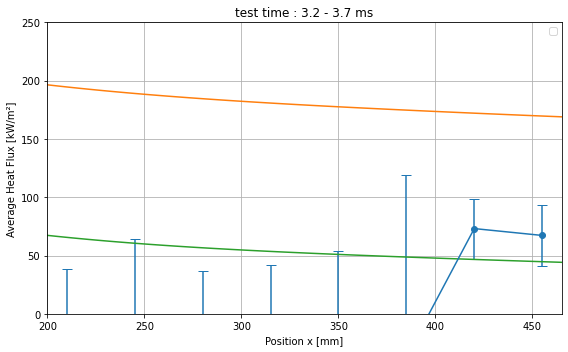

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


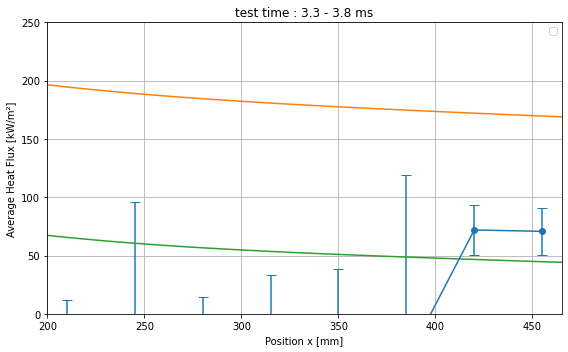

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


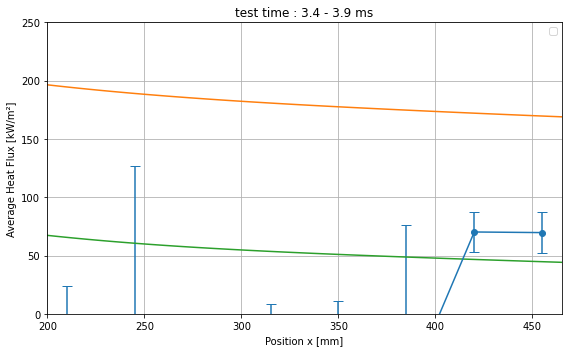

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


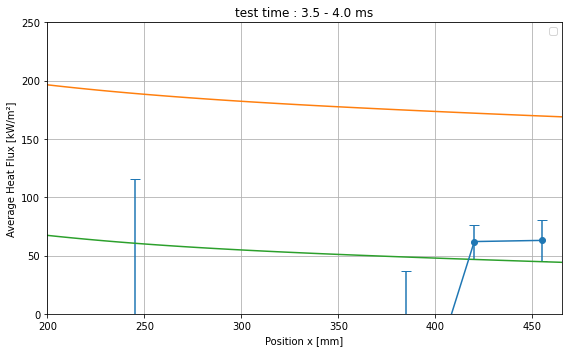

In [27]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 파일 경로
heatflux_file = os.path.join(folder_path, "HeatFlux_data_for_gnuplot.dat")

# 분석할 시간 범위 (단위: ms)

x_temp=np.linspace(100,500,100)
tur_temp=1626.3*(x_temp/1000)**4 - 2863.3*(x_temp/1000)**3 + 1952.7*(x_temp/1000)**2 - 679.31*(x_temp/1000) + 274.51
lam_temp=1933.9*(x_temp/1000)**4 - 3364.5*(x_temp/1000)**3 + 2241.5*(x_temp/1000)**2 - 732.41*(x_temp/1000) + 147.94

start=1.
for i in np.linspace(start,start+2.5,26):
    start_ms = i
    end_ms = start_ms+0.5

    # 파일 읽기
    df_q = pd.read_csv(heatflux_file, sep="\t")

    # 시간 필터링
    df_q_range = df_q[(df_q["time [ms]"] >= start_ms) & (df_q["time [ms]"] <= end_ms)]

    # 평균 및 표준편차 계산 (단위 환산: W/m² → kW/m²)
    positions = []
    means = []
    stds = []

    for col in df_q_range.columns[1:]:
        pos = col.split("@")[1].replace("mm", "")
        positions.append(int(pos))
        
        q_values = df_q_range[col] / 1000  # kW/m²
        means.append(q_values.mean())
        stds.append(q_values.std())

    # 정렬 (x 위치 순서대로)
    sorted_data = sorted(zip(positions, means, stds))
    positions, means, stds = zip(*sorted_data)

    # 에러바 그래프
    plt.figure(figsize=(8, 5))
    plt.errorbar(positions, means, yerr=stds, fmt='o-', capsize=5)
    plt.plot(x_temp,tur_temp)
    plt.plot(x_temp,lam_temp)
    plt.title(f"test time : {start_ms:.1f} - {end_ms:.1f} ms")
    plt.xlabel("Position x [mm]")
    plt.ylabel("Average Heat Flux [kW/m²]")
    plt.xlim(200,465)
    plt.ylim(-0,250)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    pdf_path = os.path.join(folder_path, "Average HeatFlux.pdf")
    # plt.savefig(pdf_path, dpi=600, bbox_inches='tight')
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


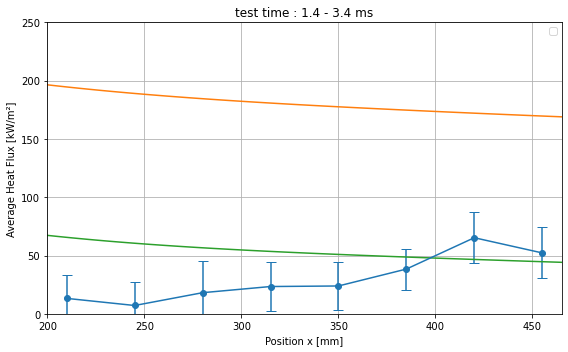

In [65]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 파일 경로
heatflux_file = os.path.join(folder_path, "HeatFlux_data_for_gnuplot.dat")

# 분석할 시간 범위 (단위: ms)

x_temp=np.linspace(100,500,100)
tur_temp=1626.3*(x_temp/1000)**4 - 2863.3*(x_temp/1000)**3 + 1952.7*(x_temp/1000)**2 - 679.31*(x_temp/1000) + 274.51
lam_temp=1933.9*(x_temp/1000)**4 - 3364.5*(x_temp/1000)**3 + 2241.5*(x_temp/1000)**2 - 732.41*(x_temp/1000) + 147.94

start=1.39

start_ms = start
end_ms = start_ms+2.

# 파일 읽기
df_q = pd.read_csv(heatflux_file, sep="\t")

# 시간 필터링
df_q_range = df_q[(df_q["time [ms]"] >= start_ms) & (df_q["time [ms]"] <= end_ms)]

# 평균 및 표준편차 계산 (단위 환산: W/m² → kW/m²)
positions = []
means = []
stds = []

for col in df_q_range.columns[1:]:
    pos = col.split("@")[1].replace("mm", "")
    positions.append(int(pos))
    
    q_values = df_q_range[col] / 1000  # kW/m²
    means.append(q_values.mean())
    stds.append(q_values.std())

# 정렬 (x 위치 순서대로)
sorted_data = sorted(zip(positions, means, stds))
positions, means, stds = zip(*sorted_data)

# 에러바 그래프
plt.figure(figsize=(8, 5))
plt.errorbar(positions, means, yerr=stds, fmt='o-', capsize=5)
plt.plot(x_temp,tur_temp)
plt.plot(x_temp,lam_temp)
plt.title(f"test time : {start_ms:.1f} - {end_ms:.1f} ms")
plt.xlabel("Position x [mm]")
plt.ylabel("Average Heat Flux [kW/m²]")
plt.xlim(200,465)
plt.ylim(-0,250)
plt.grid(True)
plt.legend()
plt.tight_layout()
pdf_path = os.path.join(folder_path, "Average HeatFlux.pdf")
plt.savefig(pdf_path, dpi=600, bbox_inches='tight')
plt.show()
